# Projeto 2 - Ciência dos Dados

Nome: Fernando Kenji Sakabe

Nome: Lucas Keichi Fukada

Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
# Classificador automático de sentimento


## Preparando o ambiente no jupyter:

In [1]:
import tweepy
import math
import functools
import os.path
import operator
import pandas as pd
import json
import numpy as np
from random import shuffle
import emoji
import matplotlib.pyplot as plt


## Função para limpar o texto

Aqui temos uma função para limpeza dos dados, eliminando caracteres especiais como "!", "@" entre outros, separamos também os emojis entre si e entre palavras, além disso adicionamos uma parte para retirar links para outras páginas.

In [2]:
import re 

def cleanup(text):
    """
        Função de limpeza muito simples que troca alguns sinais básicos por espaços
    """
    import string
    
    # Código para retirar links para outras páginas
    text = ' '.join(word for word in text.split() if not word.startswith('https'))
    
    # Código para limpeza para os emojis (espaço entre emojis e emojis e entre emojis e palavras)
    text_split_emoji = emoji.get_emoji_regexp().split(text)
    text_split_whitespace = [substr.split() for substr in text_split_emoji]
    text_split = functools.reduce(operator.concat, text_split_whitespace)
    text = ' '.join(word for word in text_split)
    
    punctuation = '[!-/.:?;@]' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    nova_linha = '[\n]'
    text_subbed = re.sub(pattern, ' ', text)
    text_subbed = re.sub(nova_linha, " ", text_subbed)
    return text_subbed

Outros tipos de limpeza que podemos fazer é substituir expressões de risadas por um só termo, pois uma expressão como "kkkk" pode ser digitada com uma variação no número de caracteres. Podemos retirar artigos, preposições e conjunções para analisar palavras que podem ser mais interessantes para o projeto.

___
## Autenticando no  Twitter

* Conta: ***[Preencha aqui o id da sua conta. Ex: @fulano ]***


___
## Etapas do projeto:

### Escolha de um produto e coleta das mensagens


Capturando os dados do twitter:

Salvando os dados em uma planilha Excel:

___
### Classificando as mensagens na coragem

Esta etapa é manual. Faça a mesma pelo Excel.

In [3]:
#Leitura do excel já classificado
pokemon_treino = pd.read_excel("pokemon_classificado.xlsx", "Treinamento")
pokemon_teste = pd.read_excel("pokemon_classificado.xlsx", "Teste")

___
### Montando o Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [4]:
pokemon_treino_texto = pd.Series(pokemon_treino["Treinamento"])
pokemon_treino_texto = pokemon_treino_texto.str.cat()
pokemon_treino_texto = cleanup(pokemon_treino_texto.lower())
lista_relativa = pokemon_treino_texto.split()
frequencia_absoluta = pd.Series(lista_relativa).value_counts()
frequencia_relativa = pd.Series(lista_relativa).value_counts(True)
frequencia_absoluta

de               199
pokémon          168
e                140
que              139
o                129
pokemon          121
eu                94
a                 93
é                 85
um                68
do                66
pra               66
no                65
em                61
com               60
não               59
go                46
na                41
meu               40
uma               40
me                37
mas               34
mais              33
os                32
da                32
só                31
se                29
tem               24
jogar             24
para              22
                ... 
comigogente        1
cansando           1
not                1
maior              1
65                 1
catarrento         1
redeu              1
👍🏼                 1
tals               1
evitando           1
grupo              1
academia           1
namorado           1
teus               1
bonitinhos         1
kkkkkkkkkkkk       1
voltei       

In [5]:
relevante = pokemon_treino.loc[pokemon_treino["Relevância"] == 1]
pokemon_relevante_texto = pd.Series(relevante.Treinamento)
pokemon_relevante_texto = pokemon_relevante_texto.str.cat()
pokemon_relevante_texto = cleanup(pokemon_relevante_texto.lower())
lista_relevante_relativa = pokemon_relevante_texto.split()
frequencia_absoluta_relevante = pd.Series(lista_relevante_relativa).value_counts()
frequencia_relativa_relevante = pd.Series(lista_relevante_relativa).value_counts(True)
frequencia_relativa_relevante

go              0.037998
pokémon         0.032437
de              0.029657
no              0.025023
pokemon         0.023170
que             0.021316
é               0.017609
eu              0.017609
pra             0.016682
meu             0.016682
me              0.013902
uma             0.012048
o               0.012048
a               0.012048
e               0.012048
masters         0.011121
um              0.010195
jogar           0.010195
código          0.009268
na              0.009268
treinador       0.009268
em              0.007414
amizade         0.007414
começar         0.006487
joga            0.005561
do              0.005561
q               0.005561
com             0.005561
tem             0.004634
não             0.004634
                  ...   
carregador      0.000927
gooq            0.000927
c               0.000927
fruta           0.000927
7865            0.000927
pokebola        0.000927
apareço         0.000927
tomara          0.000927
botar           0.000927


In [6]:
irrelevante = pokemon_treino.loc[pokemon_treino["Relevância"] == 0]
pokemon_irrelevante_texto = pd.Series(irrelevante.Treinamento)
pokemon_irrelevante_texto = pokemon_irrelevante_texto.str.cat()
pokemon_irrelevante_texto = cleanup(pokemon_irrelevante_texto.lower())
lista_irrelevante_relativa = pokemon_irrelevante_texto.split()
frequencia_absoluta_irrelevante = pd.Series(lista_irrelevante_relativa).value_counts()
frequencia_relativa_irrelevante = pd.Series(lista_irrelevante_relativa).value_counts(True)
frequencia_relativa_irrelevante

de                       0.033854
pokémon                  0.027367
e                        0.025745
que                      0.023515
o                        0.023515
pokemon                  0.019663
a                        0.016420
eu                       0.015406
é                        0.013379
do                       0.012163
um                       0.011555
com                      0.010947
não                      0.010947
em                       0.010744
pra                      0.009730
no                       0.007703
na                       0.006284
mas                      0.006081
mais                     0.006081
os                       0.005676
da                       0.005473
só                       0.005473
uma                      0.005473
se                       0.005271
meu                      0.004460
me                       0.004460
tem                      0.004257
para                     0.003852
as                       0.003649
ele           

In [7]:
pokemon_teste_texto = pd.Series(pokemon_teste["Teste"])
pokemon_teste_texto_limpo = []
for i in pokemon_teste_texto:
    pokemon_teste_texto_limpo.append(cleanup(i.lower()))


In [8]:
quantidade_relevante = pokemon_treino.Relevância.value_counts(True)
pokemon_treino
quantidade_relevante

0    0.79
1    0.21
Name: Relevância, dtype: float64

In [9]:
quantidade_relevante_teste_numero = pokemon_teste.Relevante.value_counts(True)
quantidade_relevante_teste_numero

0    0.795
1    0.205
Name: Relevante, dtype: float64

___
### Verificando a performance

Agora você deve testar o seu classificador com a base de Testes.

In [10]:
avaliacao = []

for i in pokemon_teste_texto_limpo:
    
    prob_relev = 0
    prob_irrelev = 0
    
    for w in i.split():
        
        if w in lista_relevante_relativa:
            prob_relev += np.log10((frequencia_relativa_relevante[w]))
        else:
            prob_relev += np.log10((1)/(len(frequencia_relativa_relevante)+1000000))
    
        if w in lista_irrelevante_relativa:
            prob_irrelev += np.log10((frequencia_relativa_irrelevante[w]))
        else:
            prob_irrelev += np.log10((1)/(len(frequencia_relativa_irrelevante)+1000000))
            
    prob_irrelev +=np.log10(0.79)
    prob_relev +=np.log10(0.21)

    if (prob_relev>prob_irrelev):
        avaliacao.append(1)
    else:
        avaliacao.append(0)
        
avaliacao=pd.Series(avaliacao)
avaliacao.value_counts(True)

0    0.855
1    0.145
dtype: float64

In [14]:
Victory = 0

for a in range(0, (len(avaliacao)-1)):
    if avaliacao[a] == pokemon_teste.Relevante[a]:
        Victory += 1
print("A acurácia do avaliador foi de", Victory/len(pokemon_teste)*100, "%")
        
        

A acurácia do avaliador foi de 83.5 %


In [12]:
verdadeiro_positivo=0
falso_negativo=0
falso_positivo=0
verdadeiro_negativo=0
verificacao=[]
for i in range(200):
    if pokemon_teste["Relevante"][i]==1:
        if avaliacao[i]==1:
            verdadeiro_positivo+=1
            verificacao.append("verdadeiro_positivo")
        else:
            falso_negativo+=1
            verificacao.append("falso_negativo")
    else:
        if avaliacao[i]==1:
            falso_positivo+=1
            verificacao.append("falso_positivo")
        else:
            verdadeiro_negativo+=1
            verificacao.append("verdadeiro_negativo")
verdadeiro_positivo=verdadeiro_positivo/200*100
falso_negativo=falso_negativo/200*100
falso_positivo=falso_positivo/200*100
verdadeiro_negativo=verdadeiro_negativo/200*100
print("A porcentagem de verdadeiros_positivos é {0}%".format(verdadeiro_positivo))
print("A porcentagem de falso_negativo é {0}%".format(falso_negativo))
print("A porcentagem de falso_positivo é {0}%".format(falso_positivo))
print("A porcentagem de verdadeiros_negativo é {0}%".format(verdadeiro_negativo))

A porcentagem de verdadeiros_positivos é 9.5%
A porcentagem de falso_negativo é 11.0%
A porcentagem de falso_positivo é 5.0%
A porcentagem de verdadeiros_negativo é 74.5%


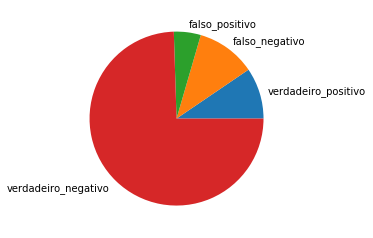

In [13]:
plt.pie([verdadeiro_positivo, falso_negativo, falso_positivo,verdadeiro_negativo],
        labels=["verdadeiro_positivo","falso_negativo", "falso_positivo","verdadeiro_negativo"])
plt.show()

___
### Concluindo

O avaliador conseguiu uma proporção de relevantes e irrelevantes que foi aproximadamente 15% relevantes e 80% irrelevantes, muito próxima da obtida empiricamente que por sua vez tinha uma proporção de 20% relevantes para 80% irrelevantes. Além disso, a taxa de acerto, foi de 83,5%, sendo 74,5% de acertos de irrelevantes e 9,5% de acertos de relevantes dentre os 200 tweets de teste.

Para este projeto não foram levados em conta as mensagens com dupla negação ou sarcasmo, pois não são de relevância para a ocasião uma vez que apenas queremos saber a relevância dos jogos dentre os tweets sobre Pokémon.

A Pokémon Company continuaria financiando o projeto para saber a relevância dos seus jogos dentro do seu portifólio de jogos, ou seja, quais são os mais comentados e seu impacto na comunidade de jogadores e fãs de Pokémon em geral.

Não podemos utilizar o próprio avaliador para alimentar a base de treinamento, pois o avaliador iria apenas se treinar com palavras que já existem nele, isto é, a probabilidade das palavras já existentes somente iria aumentar e o clasisficador ficaria "viciado".

Outros cenários para utilizar esse classificador são previsão do tempo e análise de fraudes. (referência: https://www.smarten.com/blog/what-is-naive-bayes-classification-and-how-is-it-used-for-enterprise-analysis/)

## Aperfeiçoamento:

Os trabalhos vão evoluir em conceito dependendo da quantidade de itens avançados:

* Limpar: \n, :, ", ', (, ), etc SEM remover emojis X
* Corrigir separação de espaços entre palavras e emojis ou emojis e emojis X
* Propor outras limpezas e transformações que não afetem a qualidade da informação ou classificação X
* Criar categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante (3 categorias: C, mais categorias conta para B)
* Explicar por que não posso usar o próprio classificador para gerar mais amostras de treinamento X
* Propor diferentes cenários para Naïve Bayes fora do contexto do projeto X
* Sugerir e explicar melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* Montar um dashboard que periodicamente realiza análise de sentimento e visualiza estes dados

# Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**